# Simulating Network Deliberation 

In [2]:
# Configure plotting in Jupyter
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({
    'figure.figsize': (7.5, 7.5),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})
# Seed random number generator
import random
from numpy import random as nprand

In [3]:
# Import NetworkX
import networkx as nx
import numpy as np

In [4]:
import numpy as np

### Assign nodes to groups 

In [5]:
from learning import *

In [6]:
from topologies import *

## Cliques

To keep beliefs after stages []
Stage # 0
The initial beliefs at stage 0 are {1: [0, 0, 0, 1, 1], 2: [1, 0, 0, 1, 1], 3: [1, 0, 0, 1, 0], 4: [0, 1, 0, 1, 1], 5: [1, 1, 1, 0, 1], 6: [1, 1, 0, 1, 1], 7: [1, 1, 0, 0, 0], 8: [1, 1, 1, 1, 1], 9: [0, 1, 0, 0, 0], 10: [1, 1, 0, 0, 0], 11: [0, 0, 1, 1, 1], 12: [1, 0, 0, 1, 1], 13: [0, 0, 0, 1, 0], 14: [0, 1, 1, 1, 1], 15: [0, 0, 1, 1, 0], 16: [1, 1, 1, 1, 1], 17: [1, 1, 1, 0, 1], 18: [1, 0, 1, 1, 1], 19: [0, 0, 1, 0, 0], 20: [0, 1, 1, 0, 1], 21: [1, 1, 1, 1, 0], 22: [1, 1, 1, 0, 1], 23: [0, 1, 1, 0, 0], 24: [0, 1, 1, 0, 1], 25: [1, 0, 1, 0, 1], 26: [1, 0, 0, 1, 0], 27: [1, 0, 1, 1, 1], 28: [0, 1, 1, 0, 1], 29: [0, 1, 0, 0, 0], 30: [1, 0, 1, 1, 1], 31: [1, 0, 1, 0, 1], 32: [1, 0, 1, 0, 1], 33: [0, 0, 0, 0, 1], 34: [0, 1, 1, 0, 1], 35: [0, 1, 0, 0, 1], 36: [1, 1, 1, 0, 1], 37: [0, 1, 0, 0, 0], 38: [0, 1, 1, 1, 1], 39: [1, 1, 1, 0, 1], 40: [1, 1, 1, 0, 1], 41: [0, 1, 0, 0, 0], 42: [1, 0, 1, 0, 0], 43: [1, 1, 0, 1, 1], 44: [0, 0, 1, 1, 0], 45: [1,

Beliefs at 1 after learn() are [{1: [0, 0, 0, 1, 1], 2: [1, 0, 0, 1, 1], 3: [1, 0, 0, 1, 0], 4: [0, 1, 0, 1, 1], 5: [1, 1, 1, 0, 1], 6: [1, 1, 0, 1, 1], 7: [1, 1, 0, 0, 0], 8: [1, 1, 1, 1, 1], 9: [0, 1, 0, 0, 0], 10: [1, 1, 0, 0, 0], 11: [0, 0, 1, 1, 1], 12: [1, 0, 0, 1, 1], 13: [0, 0, 0, 1, 0], 14: [0, 1, 1, 1, 1], 15: [0, 0, 1, 1, 0], 16: [1, 1, 1, 1, 1], 17: [1, 1, 1, 0, 1], 18: [1, 0, 1, 1, 1], 19: [0, 0, 1, 0, 0], 20: [0, 1, 1, 0, 1], 21: [1, 1, 1, 1, 0], 22: [1, 1, 1, 0, 1], 23: [0, 1, 1, 0, 0], 24: [0, 1, 1, 0, 1], 25: [1, 0, 1, 0, 1], 26: [1, 0, 0, 1, 0], 27: [1, 0, 1, 1, 1], 28: [0, 1, 1, 0, 1], 29: [0, 1, 0, 0, 0], 30: [1, 0, 1, 1, 1], 31: [1, 0, 1, 0, 1], 32: [1, 0, 1, 0, 1], 33: [0, 0, 0, 0, 1], 34: [0, 1, 1, 0, 1], 35: [0, 1, 0, 0, 1], 36: [1, 1, 1, 0, 1], 37: [0, 1, 0, 0, 0], 38: [0, 1, 1, 1, 1], 39: [1, 1, 1, 0, 1], 40: [1, 1, 1, 0, 1], 41: [0, 1, 0, 0, 0], 42: [1, 0, 1, 0, 0], 43: [1, 1, 0, 1, 1], 44: [0, 0, 1, 1, 0], 45: [1, 0, 1, 0, 0], 46: [0, 1, 1, 1, 0], 47: [0, 1,

Beliefs at 2 after learn() are [{1: [0, 0, 0, 1, 1], 2: [1, 0, 0, 1, 1], 3: [1, 0, 0, 1, 0], 4: [0, 1, 0, 1, 1], 5: [1, 1, 1, 0, 1], 6: [1, 1, 0, 1, 1], 7: [1, 1, 0, 0, 0], 8: [1, 1, 1, 1, 1], 9: [0, 1, 0, 0, 0], 10: [1, 1, 0, 0, 0], 11: [0, 0, 1, 1, 1], 12: [1, 0, 0, 1, 1], 13: [0, 0, 0, 1, 0], 14: [0, 1, 1, 1, 1], 15: [0, 0, 1, 1, 0], 16: [1, 1, 1, 1, 1], 17: [1, 1, 1, 0, 1], 18: [1, 0, 1, 1, 1], 19: [0, 0, 1, 0, 0], 20: [0, 1, 1, 0, 1], 21: [1, 1, 1, 1, 0], 22: [1, 1, 1, 0, 1], 23: [0, 1, 1, 0, 0], 24: [0, 1, 1, 0, 1], 25: [1, 0, 1, 0, 1], 26: [1, 0, 0, 1, 0], 27: [1, 0, 1, 1, 1], 28: [0, 1, 1, 0, 1], 29: [0, 1, 0, 0, 0], 30: [1, 0, 1, 1, 1], 31: [1, 0, 1, 0, 1], 32: [1, 0, 1, 0, 1], 33: [0, 0, 0, 0, 1], 34: [0, 1, 1, 0, 1], 35: [0, 1, 0, 0, 1], 36: [1, 1, 1, 0, 1], 37: [0, 1, 0, 0, 0], 38: [0, 1, 1, 1, 1], 39: [1, 1, 1, 0, 1], 40: [1, 1, 1, 0, 1], 41: [0, 1, 0, 0, 0], 42: [1, 0, 1, 0, 0], 43: [1, 1, 0, 1, 1], 44: [0, 0, 1, 1, 0], 45: [1, 0, 1, 0, 0], 46: [0, 1, 1, 1, 0], 47: [0, 1,

Beliefs at 3 after learn() are [{1: [0, 0, 0, 1, 1], 2: [1, 0, 0, 1, 1], 3: [1, 0, 0, 1, 0], 4: [0, 1, 0, 1, 1], 5: [1, 1, 1, 0, 1], 6: [1, 1, 0, 1, 1], 7: [1, 1, 0, 0, 0], 8: [1, 1, 1, 1, 1], 9: [0, 1, 0, 0, 0], 10: [1, 1, 0, 0, 0], 11: [0, 0, 1, 1, 1], 12: [1, 0, 0, 1, 1], 13: [0, 0, 0, 1, 0], 14: [0, 1, 1, 1, 1], 15: [0, 0, 1, 1, 0], 16: [1, 1, 1, 1, 1], 17: [1, 1, 1, 0, 1], 18: [1, 0, 1, 1, 1], 19: [0, 0, 1, 0, 0], 20: [0, 1, 1, 0, 1], 21: [1, 1, 1, 1, 0], 22: [1, 1, 1, 0, 1], 23: [0, 1, 1, 0, 0], 24: [0, 1, 1, 0, 1], 25: [1, 0, 1, 0, 1], 26: [1, 0, 0, 1, 0], 27: [1, 0, 1, 1, 1], 28: [0, 1, 1, 0, 1], 29: [0, 1, 0, 0, 0], 30: [1, 0, 1, 1, 1], 31: [1, 0, 1, 0, 1], 32: [1, 0, 1, 0, 1], 33: [0, 0, 0, 0, 1], 34: [0, 1, 1, 0, 1], 35: [0, 1, 0, 0, 1], 36: [1, 1, 1, 0, 1], 37: [0, 1, 0, 0, 0], 38: [0, 1, 1, 1, 1], 39: [1, 1, 1, 0, 1], 40: [1, 1, 1, 0, 1], 41: [0, 1, 0, 0, 0], 42: [1, 0, 1, 0, 0], 43: [1, 1, 0, 1, 1], 44: [0, 0, 1, 1, 0], 45: [1, 0, 1, 0, 0], 46: [0, 1, 1, 1, 0], 47: [0, 1,

Beliefs at 4 after learn() are [{1: [0, 0, 0, 1, 1], 2: [1, 0, 0, 1, 1], 3: [1, 0, 0, 1, 0], 4: [0, 1, 0, 1, 1], 5: [1, 1, 1, 0, 1], 6: [1, 1, 0, 1, 1], 7: [1, 1, 0, 0, 0], 8: [1, 1, 1, 1, 1], 9: [0, 1, 0, 0, 0], 10: [1, 1, 0, 0, 0], 11: [0, 0, 1, 1, 1], 12: [1, 0, 0, 1, 1], 13: [0, 0, 0, 1, 0], 14: [0, 1, 1, 1, 1], 15: [0, 0, 1, 1, 0], 16: [1, 1, 1, 1, 1], 17: [1, 1, 1, 0, 1], 18: [1, 0, 1, 1, 1], 19: [0, 0, 1, 0, 0], 20: [0, 1, 1, 0, 1], 21: [1, 1, 1, 1, 0], 22: [1, 1, 1, 0, 1], 23: [0, 1, 1, 0, 0], 24: [0, 1, 1, 0, 1], 25: [1, 0, 1, 0, 1], 26: [1, 0, 0, 1, 0], 27: [1, 0, 1, 1, 1], 28: [0, 1, 1, 0, 1], 29: [0, 1, 0, 0, 0], 30: [1, 0, 1, 1, 1], 31: [1, 0, 1, 0, 1], 32: [1, 0, 1, 0, 1], 33: [0, 0, 0, 0, 1], 34: [0, 1, 1, 0, 1], 35: [0, 1, 0, 0, 1], 36: [1, 1, 1, 0, 1], 37: [0, 1, 0, 0, 0], 38: [0, 1, 1, 1, 1], 39: [1, 1, 1, 0, 1], 40: [1, 1, 1, 0, 1], 41: [0, 1, 0, 0, 0], 42: [1, 0, 1, 0, 0], 43: [1, 1, 0, 1, 1], 44: [0, 0, 1, 1, 0], 45: [1, 0, 1, 0, 0], 46: [0, 1, 1, 1, 0], 47: [0, 1,

Beliefs at 5 after learn() are [{1: [0, 0, 0, 1, 1], 2: [1, 0, 0, 1, 1], 3: [1, 0, 0, 1, 0], 4: [0, 1, 0, 1, 1], 5: [1, 1, 1, 0, 1], 6: [1, 1, 0, 1, 1], 7: [1, 1, 0, 0, 0], 8: [1, 1, 1, 1, 1], 9: [0, 1, 0, 0, 0], 10: [1, 1, 0, 0, 0], 11: [0, 0, 1, 1, 1], 12: [1, 0, 0, 1, 1], 13: [0, 0, 0, 1, 0], 14: [0, 1, 1, 1, 1], 15: [0, 0, 1, 1, 0], 16: [1, 1, 1, 1, 1], 17: [1, 1, 1, 0, 1], 18: [1, 0, 1, 1, 1], 19: [0, 0, 1, 0, 0], 20: [0, 1, 1, 0, 1], 21: [1, 1, 1, 1, 0], 22: [1, 1, 1, 0, 1], 23: [0, 1, 1, 0, 0], 24: [0, 1, 1, 0, 1], 25: [1, 0, 1, 0, 1], 26: [1, 0, 0, 1, 0], 27: [1, 0, 1, 1, 1], 28: [0, 1, 1, 0, 1], 29: [0, 1, 0, 0, 0], 30: [1, 0, 1, 1, 1], 31: [1, 0, 1, 0, 1], 32: [1, 0, 1, 0, 1], 33: [0, 0, 0, 0, 1], 34: [0, 1, 1, 0, 1], 35: [0, 1, 0, 0, 1], 36: [1, 1, 1, 0, 1], 37: [0, 1, 0, 0, 0], 38: [0, 1, 1, 1, 1], 39: [1, 1, 1, 0, 1], 40: [1, 1, 1, 0, 1], 41: [0, 1, 0, 0, 0], 42: [1, 0, 1, 0, 0], 43: [1, 1, 0, 1, 1], 44: [0, 0, 1, 1, 0], 45: [1, 0, 1, 0, 0], 46: [0, 1, 1, 1, 0], 47: [0, 1,

No handles with labels found to put in legend.


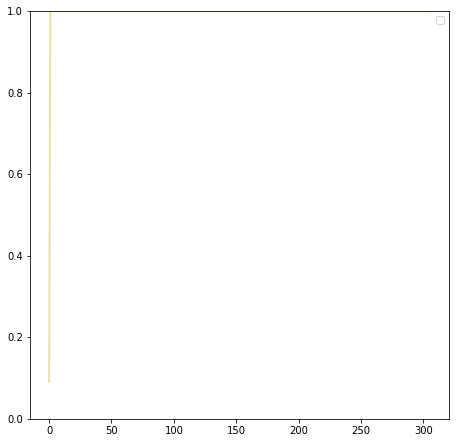

In [7]:
G = nx.complete_graph(100)

G = nx.complete_graph(range(1, 100))
list(G.nodes())
#nx.draw(G)

beliefs_stages = []
print("To keep beliefs after stages", beliefs_stages)

stages = 5
true_value = [1, 1, 1, 0, 1]
steps = 50


for stage in range(stages + 1): 
    if stage == 0: 
        ini_beliefs = initial_beliefs_noisy(G, true_value, p_error= .40)
        print("Stage #", stage)
        print("The initial beliefs at stage", stage, "are", ini_beliefs)
        beliefs_list =  learn(G, ini_beliefs, learning_step_best_neighbor, true_value, steps)
        beliefs_stages += beliefs_list
        print("Beliefs at stage", stage, "after learn() are", beliefs_stages)
        
    else:
        sub_ini_beliefs = beliefs_list[-1]
        print("Stage #", stage)
        print("The initial beliefs at stage", stage, "are", sub_ini_beliefs)
        beliefs_list = learn(G, sub_ini_beliefs, learning_step_best_neighbor, true_value, steps)
        beliefs_stages += beliefs_list
        print("Beliefs at", stage, "after learn() are", beliefs_stages)
        
print("beliefs of all stages", beliefs_stages)

plot_beliefs_correct(beliefs_stages, true_value)

In [ ]:
#N = 100
#M = 2
#D = 2
#get_long_path_stage_groups(N, M, D)

# Plotting

In [ ]:
G = nx.karate_club_graph()
plt.subplot(1, 1, 1)
plt.title("Karate club")
true_value=[1, 0, 1, 0, 1]

ini_beliefs = initial_beliefs_noisy(G, true_value, p_error= .20)


beliefs_list =  learn(G, ini_beliefs, most_popular_list, true_value, steps = 100)
plot_beliefs_correct(beliefs_list, true_value)

In [ ]:
G = nx.karate_club_graph()
plt.subplot(1, 4, 1)
plt.title("Karate club")
true_value = [1, 0, 1, 0, 1]
ini_beliefs = initial_beliefs_noisy(G, true_value, p_error= .20)

beliefs_list =  learn(G, ini_beliefs, rand_neighbor_list, true_value, steps = 100)
plot_beliefs_correct(beliefs_list, true_value)

plt.subplot(1, 4, 2)
beliefs_list =  learn(G, ini_beliefs, random_neighbor_bit, true_value, steps = 100)
plot_beliefs_correct(beliefs_list, true_value)

plt.subplot(1, 4, 3)
beliefs_list =  learn(G, ini_beliefs, most_popular_list, true_value, steps = 100)
plot_beliefs_correct(beliefs_list, true_value)

plt.subplot(1, 4, 4)
beliefs_list =  learn(G, ini_beliefs, learning_step_best_neighbor, true_value, steps = 100)
plot_beliefs_correct(beliefs_list, true_value)


#plot_belief_bits_correct(beliefs_list, true_value = [1, 0, 1, 0, 1])
plt.tight_layout()

In [ ]:
G = nx.karate_club_graph()
plt.subplot(1, 1, 1)
plt.title("Karate club")
true_value=[1, 0, 1, 0, 1]

ini_beliefs = initial_beliefs_noisy(G, true_value, p_error= .40)
beliefs_list =  learn(G, ini_beliefs, learning_step_bit_majority, true_value, steps = 10)
plot_beliefs_correct(beliefs_list, true_value)
plt.tight_layout()

In [ ]:
G = nx.karate_club_graph()
plt.subplot(1, 1, 1)
plt.title("Karate club")
true_value=[1, 0, 1, 0, 1]

ini_beliefs = initial_beliefs_noisy(G, true_value, p_error= .40)
beliefs_list =  learn(G, ini_beliefs, random_neighbor_bit, true_value, steps = 10)
plot_beliefs_correct(beliefs_list, true_value)
plt.tight_layout()

## old code 